# 2019 DA Project:  Supply Chain - Safety Stock

## Project Plan

- Choose a real world phenomenon
- Research and understand the phenomenon
- Identify variables 
- Match variables to a distribution
- Synthesise the dataset
- Analyse variables and their inter relationships
- Devise an algorithm or method to synthesise those variables
- Generate dataset

## Introduction

I have chosen safety stock that is held in distribution centres as the real world phenomenon to measure.   Some companies hold large levels of safety stocks to avoid shortfalls.  However, that is neither economical nor efficient operationally.  Given tight margins, complex sourcing and international dimensions, it is a challenge for companies to maximise their sales with minimum investment in inventory in distribution centres.

## Research

### What is a Supply Chain?

A supply chains consist of suppliers, manufacturers and distribution centres: 

- Suppliers supply raw materials or finished products
- Manufacturers convert raw materials into finished products
- Distribution centres sell finished products to customers

Customer satisfaction is linked to an effective supply chain.  In order to minimise risk of shortages, a certain level of inventory is held in excess of expected demand.  This is called safety stock.  It is necessary as it is impossible to predict future sales with 100% accuracy and given the complexity and lead times with supply chains, any issue can impact the company's ability to deliver product to forecast e.g supply constraints.

Product shortages result in lost customers sales.  If a product is not on the shelf, customers look elsewhere.  To resolve product shortages, many companies increase safety stocks.   Is there a correlation between product shortages and safety stock?  Do other variables such as forecast, lead times, cycletime at the manufacturer have an impact?  Safety stocks tie up Company money and may inhibit investment in other areas of the business which could drive future growth.  The objective of the dataset  is to identify if safety stocks can be reduced to free up cash for the company.  

## Variables

Determine the variables.  5 variables have been identified: 

#### Variable 1 : ABC
This particular company has 3 categories of products.  In materials management,  ABC analysis divides inventory into three categories:
 - "A" items.  These are the high runners.
 - "B" items.  These are lower runners.
 - "C" items.  Very slow moving and often built to order.

A different approach is required for each category:
"A" are high revenue products: they generate 80% of annual sales of which are 20% of product part numbers.
"B" are middle to low revenue products: 15% annual sales and 20% of product part numbers.
"C" are low revenue products: 5% annual sales and 60% product part numbers.  Generally these are built to order.

For this company, ABC classification falls within the Pareto Distribution parameters.  The Pareto distribution is a skewed distribution and is also called as the '80-20 rule'. This distribution demonstrates inequity i.e. not all things are divided equally. 80% of values are in the 20% range with the remaining 20% in the 80% range. This is clearly illustrated in the company being analysed - 80% of revenue is often from 20% of products.


#### Variable 2:  Distribution time in days to the distribution centre
This relates to the transportation time from the manufacturer to the distribution centres.  The time in days has been set at 5 to a range of distribution centres across the globe.  A combination of air, sea and road freight is used.  Established channels are used and contracts negociated to ensure global consistency of 5 working days or 1 week.  A normal distribution is therefore appropriate.
 
#### Variable 3:  Cycle time at the Manufacturer (in days)
This relates to the manufacturers ability to manufacture the forecast set.  This also follows a normal distribution but is more widely spread as issues occur with external suppliers e.g quality issues and internally with yield etc.  All products are manufactured from similar components from bespoke suppliers.

#### Variable 4:  Sales forecast
This relates to the manufacturers ability to manufacture the forecast set.  This follows a pareto distribution as is linked to ABC classification.  

#### Variable 5:  Safety Stocks
Safety stocks cover unexpected demand or difficuties at the manufacturer.  Safety stocks tie up company money therefore potentially limiting future performance as money is not available to invest.  Safety stocks are straightforward - they cover shipping and manufacturing days and one week for risk.  They are normally distribtued as linked to the normal distributions of cycle time at the manufacturer and distribution time to the distribution centres.

## Import Libriaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import string
from random import choices

In [2]:
# Make matplotlib show interactive plots in the notebook.
%matplotlib inline
# Apply the default seaborn settings
sns.set()

### Establish size of dataset

In [3]:
# Dataset comprises 200 materials and is called sum_mat
sum_mat = 200

In [4]:
# random state
rs = np.random.RandomState(seed = 0) 

In [5]:
# Give the products random product numbers
# Adapted from https://www.geeksforgeeks.org/python-string-ascii_uppercase/ & https://codereview.stackexchange.com/questions/198182/generate-10-random-3-letter-strings
mat = ["".join(choices(string.ascii_uppercase, k=7)) for _ in range(sum_mat)]

## Match Variables to Distributions

### Variable 1 : ABC
ABC classification falls within the Pareto Distribution parameters.  The Pareto distribution is a skewed distribution and is also called as the '80-20 rule'. This distribution demonstrates inequity i.e. not all things are divided equally. 80% of values are in the 20% range with the remaining 20% in the 80% range. This is clearly illustrated in the company being analysed - 80% of revenue is often from 20% of products.

In [6]:
# Define ABC categories
abc = ["A", "B", "C"]

In [7]:
# ABC classification has a Pareto distribution
# Adapted from https:https://pynative.com/python-random-choice/
# 20% of materials are of class A with the remaining 80% split between B & C
abc_class = np.random.choice(a = abc,  p=[0.2, 0.30, 0.50], size = sum_mat)
abc_class

array(['C', 'A', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'B', 'B', 'C', 'B',
       'C', 'C', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'C', 'A',
       'C', 'A', 'C', 'A', 'A', 'A', 'B', 'C', 'B', 'C', 'B', 'B', 'A',
       'C', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'B',
       'A', 'A', 'C', 'B', 'C', 'B', 'A', 'C', 'B', 'C', 'C', 'C', 'A',
       'C', 'C', 'C', 'B', 'A', 'A', 'C', 'C', 'B', 'C', 'A', 'C', 'B',
       'B', 'B', 'B', 'C', 'B', 'A', 'C', 'B', 'C', 'B', 'C', 'C', 'C',
       'C', 'B', 'C', 'C', 'C', 'C', 'A', 'C', 'C', 'C', 'B', 'B', 'C',
       'B', 'C', 'B', 'C', 'C', 'B', 'B', 'C', 'C', 'A', 'A', 'C', 'A',
       'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'B', 'B', 'C',
       'B', 'C', 'B', 'C', 'A', 'B', 'C', 'C', 'C', 'C', 'B', 'C', 'C',
       'B', 'A', 'C', 'A', 'A', 'B', 'C', 'C', 'B', 'A', 'C', 'C', 'A',
       'B', 'B', 'C', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'B',
       'C', 'C', 'C', 'A', 'A', 'B', 'C', 'C', 'C', 'C', 'B', 'C

In [8]:
# Sales.  Generate a random sample of sales based on ABC classification.  These are normally normal distributed 

sales_A = np.round(np.random.normal(10000, 100,sum_mat), 0)
sales_B = np.round(np.random.normal(2000, 100,sum_mat), 0)
sales_C = np.round(np.random.normal(100, 10,sum_mat), 0)
def sales (mat):
  if mat['abc_class']=="A":
      return np.random.choice(sales_A,1)
  if mat['abc_class']=="B":
      return np.random.choice(sales_B,1)
  if mat['abc_class']=="C":
      return np.random.choice(sales_C,1)
sales_vol = np.concatenate((sales_A, sales_B, sales_C))

array([10072.,  9989., 10083.,  9956., 10108., 10121., 10007.,  9960.,
       10031., 10114.,  9888., 10003.,  9806., 10003., 10031., 10105.,
       10147., 10020., 10128., 10229.,  9961., 10044.,  9919., 10173.,
       10033., 10081.,  9984., 10135.,  9883., 10041., 10059., 10102.,
       10060.,  9755., 10191.,  9774.,  9986., 10071., 10057., 10076.,
        9875., 10036., 10253., 10033., 10046.,  9819., 10010., 10019.,
       10048., 10064.,  9930.,  9999., 10086.,  9990., 10031.,  9954.,
       10089.,  9998., 10131.,  9940.,  9893., 10019.,  9904., 10090.,
       10002., 10156., 10029.,  9992., 10114.,  9982.,  9946., 10009.,
        9944., 10000.,  9975.,  9922., 10051.,  9906., 10263., 10118.,
        9988., 10066.,  9883., 10018., 10127.,  9975., 10192.,  9864.,
       10147.,  9959.,  9917., 10056.,  9974., 10207.,  9831., 10110.,
        9994.,  9979., 10117., 10249., 10150.,  9934., 10157., 10050.,
       10050., 10049., 10030.,  9946., 10028., 10107., 10175.,  9998.,
      

In [9]:
# Customer shortages
# As 
#abc_sv = np.random.choice(a = abc,  p=[0.8, 0.15, 0.05], size = sum_mat)
# abc_sv

### Variable 2:  Distribution time in days to the distribution centre
This relates to the transportation time from the manufacturer to the distribution centres.  The time in days has been set at 5 to a range of distribution centres across the globe.  A combination of air, sea and road freight is used.  Established channels are used and contracts negociated to ensure global consistency of 5 working days or 1 week.

In [10]:
# Distribution time (in days) to Distribution centres
# Adapted from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
# There is some variation but generally the 5 days is adhered to
# mean and standard deviation
mu, sigma = 5, .3
dist_time = np.random.normal(mu, sigma, sum_mat)
# Adapted from https://docs.scipy.org/doc/numpy/reference/generated/numpy.around.html
dist_time = np.around(dist_time, 0)
dist_time

array([5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 4., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5.,
       5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5.,
       5., 5., 5., 6., 5., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6.])

### Variable 3:  Cycle time at the Manufacturer (in days)
This relates to the manufacturers ability to manufacture the forecast set.  This also follows a normal distribution but is more widely spread as issues occur with external suppliers e.g quality issues and internally with yield etc.  All products are manufactured from similar components from bespoke suppliers.

In [11]:
# Adapted from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
mu_c, sigma_c = 6, 1 # mean and standard deviation
cyc_time = np.random.normal(mu_c, sigma_c, sum_mat)
# Adapted from https://docs.scipy.org/doc/numpy/reference/generated/numpy.around.html
cyc_time = np.around(cyc_time, 1)
cyc_time

array([5.9, 6.8, 6.9, 5.4, 5.8, 5.7, 5.2, 7.2, 5.9, 5.5, 4.8, 5.1, 5.2,
       6.1, 5.5, 6. , 6.9, 6.3, 6.6, 6.9, 6.2, 3.5, 8. , 7.7, 5.6, 5. ,
       5.9, 5.8, 5.7, 5.9, 4.9, 4.6, 6.3, 6.6, 5.2, 4.8, 6.4, 5.7, 5.3,
       7.3, 5.1, 5. , 6.4, 6.5, 6.9, 5.7, 5.4, 5.8, 5.2, 8.3, 5.1, 5. ,
       6.4, 4.6, 6.6, 4.4, 4.3, 6.4, 7.4, 5.2, 4.6, 5. , 6.7, 5.7, 4.2,
       6.5, 6.3, 6.2, 5.7, 4.5, 4.7, 7.1, 5.8, 6.8, 5.9, 8.1, 7.3, 5.1,
       7.7, 7.1, 6.8, 4.6, 7. , 4.8, 4. , 6.3, 6.3, 6.1, 5.9, 5.4, 5. ,
       6. , 6.4, 7.3, 6.7, 5.3, 5.6, 6.3, 7.5, 5.5, 4.9, 5.8, 6.2, 4.8,
       7.7, 7.5, 8.1, 6. , 5.8, 6.5, 4. , 4.7, 5.3, 6.7, 8. , 5.4, 6.3,
       6. , 6.6, 7.2, 8.5, 6.2, 7.4, 7. , 5.8, 5.9, 6.3, 6.1, 5.3, 6.3,
       6.9, 5.4, 6.5, 7. , 5.9, 5.7, 6.5, 5.4, 5.9, 7.4, 6.3, 5.3, 6.5,
       7.1, 6.6, 5.4, 7.8, 5.4, 7.9, 6.3, 5.9, 4.6, 4.5, 6.3, 6.6, 6.2,
       7.5, 6.1, 5.8, 6.2, 7.3, 6.3, 6.8, 7. , 4.5, 6.8, 5. , 5.1, 6.8,
       5.8, 6.4, 5.7, 6. , 7.7, 6.7, 5.5, 5.5, 6. , 6.4, 7.3, 6.

In [12]:
# Total Lead time is now established (Cyle time plus ship time)
lead_time = (dist_time + cyc_time)
lead_time

array([10.9, 11.8, 11.9, 10.4, 10.8, 10.7, 10.2, 11.2, 10.9, 10.5,  9.8,
       10.1, 10.2, 11.1, 10.5, 11. , 11.9, 11.3, 11.6, 11.9, 11.2,  8.5,
       13. , 12.7, 10.6, 10. , 10.9, 10.8, 10.7, 10.9,  9.9,  9.6, 11.3,
       11.6, 10.2,  9.8, 11.4, 10.7, 10.3, 12.3, 10.1,  9. , 11.4, 11.5,
       10.9, 10.7, 10.4, 10.8, 10.2, 13.3, 10.1, 10. , 11.4,  9.6, 11.6,
       10.4,  9.3, 11.4, 12.4, 10.2,  9.6, 10. , 11.7, 10.7,  9.2, 11.5,
       11.3, 11.2, 10.7,  9.5,  9.7, 12.1, 10.8, 11.8, 10.9, 13.1, 12.3,
       10.1, 12.7, 12.1, 11.8,  9.6, 11. ,  9.8,  9. , 11.3, 11.3, 11.1,
       10.9, 10.4,  9. , 11. , 11.4, 12.3, 11.7, 10.3, 10.6, 11.3, 11.5,
       10.5,  9.9, 10.8, 11.2,  9.8, 12.7, 13.5, 13.1, 12. , 10.8, 11.5,
        9. ,  9.7, 10.3, 11.7, 13. , 10.4, 11.3, 11. , 11.6, 12.2, 13.5,
       11.2, 13.4, 12. , 10.8, 10.9, 11.3, 11.1, 10.3, 11.3, 11.9, 10.4,
       11.5, 12. , 10.9, 10.7, 11.5, 10.4, 10.9, 12.4, 11.3, 10.3, 11.5,
       12.1, 11.6, 10.4, 12.8, 10.4, 12.9, 11.3, 10

In [13]:
# Take a look at the dataset
df = pd.DataFrame({'Material': mat, 'Category': abc_class,'Ship_Days': dist_time,'Mfg_Days': cyc_time,'Lead_time': lead_time})
df

,Material,Category,Ship_Days,Mfg_Days,Lead_time
0,DUUSYJU,C,5.0,5.9,10.9
1,QBZPJMJ,A,5.0,6.8,11.8
2,FNSATNS,C,5.0,6.9,11.9
3,DBGCILM,C,5.0,5.4,10.4
4,DLFIRLV,C,5.0,5.8,10.8
...,...,...,...,...,...
195,WAETKSX,B,5.0,6.1,11.1
196,OXONVAA,C,5.0,5.8,10.8
197,VYQLAYN,B,5.0,6.4,11.4
198,PYXBYTS,C,5.0,5.1,10.1


### Variable 4: Sales forecast
This relates to the manufacturers ability to manufacture the forecast set.  

In [14]:
# Adapted from https://datatofish.com/if-condition-in-pandas-dataframe/
df.loc[df.Category == 'A', 'Mthly_Forecast'] = 1000
df.loc[df.Category == 'B', 'Mthly_Forecast'] = 100
df.loc[df.Category == 'C', 'Mthly_Forecast'] = 10

Safety stock formula:Safety stock = (Maximum daily usage * Maximum lead time in days) – (Average daily usage * Average lead time in days).

### Variable 5:  Safety Stocks
Safety stocks cover unexpected demand or difficuties at the manufacturer.  Safety stocks tie up company money therefore potentially limiting future performance as money is not available to invest.  Safety stocks are straightforware - they cover shipping and manufacturing days and one week for risk.

In [15]:
# Add safety stock - 3 weeks sales i.e 67% of Mthly_Forecast
# Adapted from https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
df2 = df.assign(Safety_Stock = df.Mthly_Forecast * .67)
df2

,Material,Category,Ship_Days,Mfg_Days,Lead_time,Mthly_Forecast,Safety_Stock
0,DUUSYJU,C,5.0,5.9,10.9,10.0,6.7
1,QBZPJMJ,A,5.0,6.8,11.8,1000.0,670.0
2,FNSATNS,C,5.0,6.9,11.9,10.0,6.7
3,DBGCILM,C,5.0,5.4,10.4,10.0,6.7
4,DLFIRLV,C,5.0,5.8,10.8,10.0,6.7
...,...,...,...,...,...,...,...
195,WAETKSX,B,5.0,6.1,11.1,100.0,67.0
196,OXONVAA,C,5.0,5.8,10.8,10.0,6.7
197,VYQLAYN,B,5.0,6.4,11.4,100.0,67.0
198,PYXBYTS,C,5.0,5.1,10.1,10.0,6.7


#### Bring in Actual Sales for Comparison purposes

In [16]:
# Adapted from https://datatofish.com/if-condition-in-pandas-dataframe/
df2.loc[df.Category == 'A', 'Actual Sales'] = 1090
df2.loc[df.Category == 'B', 'Actual Sales'] = 120
df2.loc[df.Category == 'C', 'Actual Sales'] = 15
df2

,Material,Category,Ship_Days,Mfg_Days,Lead_time,Mthly_Forecast,Safety_Stock,Actual Sales
0,DUUSYJU,C,5.0,5.9,10.9,10.0,6.7,15.0
1,QBZPJMJ,A,5.0,6.8,11.8,1000.0,670.0,1090.0
2,FNSATNS,C,5.0,6.9,11.9,10.0,6.7,15.0
3,DBGCILM,C,5.0,5.4,10.4,10.0,6.7,15.0
4,DLFIRLV,C,5.0,5.8,10.8,10.0,6.7,15.0
...,...,...,...,...,...,...,...,...
195,WAETKSX,B,5.0,6.1,11.1,100.0,67.0,120.0
196,OXONVAA,C,5.0,5.8,10.8,10.0,6.7,15.0
197,VYQLAYN,B,5.0,6.4,11.4,100.0,67.0,120.0
198,PYXBYTS,C,5.0,5.1,10.1,10.0,6.7,15.0


Dataset complete.  Time to analyse

In [17]:
# Adapted from https://stackoverflow.com/questions/49609353/pandas-dataframe-to-csv-not-exporting-all-rows/53606044
df2.to_csv("sc.csv", index=False, sep=',', mode='w')

In [18]:
sc = pd.read_csv('https://raw.githubusercontent.com/mhurley100/DA-Project-2019/master/sc.csv', sep=',')

In [19]:
sc.describe()

,Ship_Days,Mfg_Days,Mthly_Forecast,Safety_Stock,Actual Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5.025000,5.934500,268.300000,179.761000,297.550000
std,0.323882,1.037808,408.346476,273.592139,442.559365
min,4.000000,3.600000,10.000000,6.700000,15.000000
25%,5.000000,5.300000,10.000000,6.700000,15.000000
50%,5.000000,5.900000,100.000000,67.000000,120.000000
75%,5.000000,6.600000,100.000000,67.000000,120.000000
max,6.000000,9.000000,1000.000000,670.000000,1090.000000


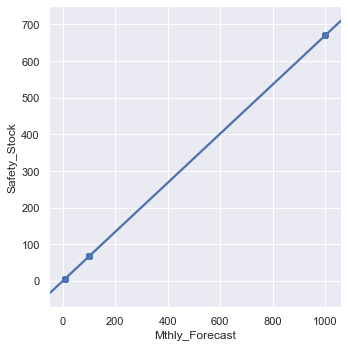

In [20]:
sns.lmplot(x="Mthly_Forecast", y="Safety_Stock", data = sc)

## References
 - [1] Python Software Foundation. Welcome to python.org.   
https://www.python.org/
 - [2] GMIT. Quality assurance framework.   
https://www.gmit.ie/general/quality-assurance-framework
 - [3] Software Freedom Conservancy. Git.   
https://git-scm.com/
 - [4] Project Jupyter. Project jupyter.    
https://jupyter.org/
 - [5] NumPy developers. Numpy.    
http://www.numpy.org/
 - [6] Clear Spider             
https://www.clearspider.com/blog-reduce-inventory-shortages/
 - [7] University of New Brunswick, NB Canada Fredericton   
http://www2.unb.ca/~ddu/4690/Lecture_notes/Lec2.pdf
 - [8] Buildmedia     
https://buildmedia.readthedocs.org/media/pdf/supplychainpy/latest/supplychainpy.pdf
 - [9] Pynative             
https://pynative.com/python-random-choice/
 - [10] Scipy          
 https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
 - [11] Wikipedia             
https://en.wikipedia.org/wiki/ABC_analysis